# Clustering - Split Dataset by sentence length
**Task**: Take a clustering dataset, split it into multiple datasets based on the length of the sentences and benchmark the performance of a clustering algorithm on each of the datasets.

In [ ]:
%pip install python-dotenv datasets transformers

In [2]:
# Helper Functions

from dotenv import load_dotenv
if(load_dotenv(".env") == False):
    print("No .env file found")
from datasets import load_dataset
from transformers import AutoModel
import matplotlib.pyplot as plt
import numpy as np

def split_dataset_by_word_count(
    dataset, split="test", splits=[500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
):
    # split dataset into bins of words of max length:
    binned_clusters = {split: {"sentences": [], "labels": []} for split in splits}

    for cluster_set in dataset[split]:
        for i in range(len(cluster_set["sentences"])):
            sentence = cluster_set["sentences"][i]
            label = cluster_set["labels"][i]
            words = len(sentence.split())
            for split in splits:
                if words <= split:
                    binned_clusters[split]["sentences"].append(sentence)
                    binned_clusters[split]["labels"].append(label)
                    break

    return binned_clusters


def dataset_distribution_plot(dataset, name, id, bins, range):
    """
    plot the distribution of word amount per sentence
    dataset: the dataset to plot
    name: the name of the dataset BigCities
    id: the id of the dataset, eg. big_cities
    """

    word_amounts = []
    for i in range(len(dataset["test"]["sentences"])):
        word_amounts += [
            len(sentence.split()) for sentence in dataset["test"]["sentences"][i]
        ]

    plt.rcParams["font.family"] = "Inter"
    plt.rcParams["axes.prop_cycle"] = plt.cycler(
        "color", ["#4269D0", "#3BA951", "#EFB117", "#FF725C"]
    )

    # create a histogram, limit x axis to 20000 and use 16 bins
    plt.hist(word_amounts, bins=bins, range=range)
    # label the axes
    plt.xlabel("Words per document")
    plt.ylabel("Document count")

    plt.title("Distribution of words per document in the " + name + " dataset")

    plt.savefig("results/clustering/" + id + "_distribution.png", dpi=300)

    plt.show()

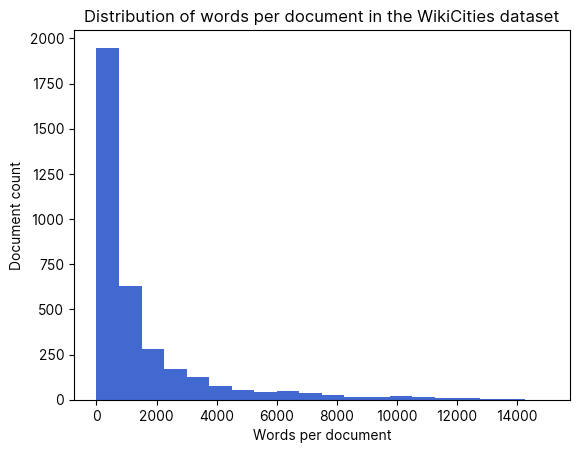

In [12]:
# plot the distribution of word amount per sentence
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["font.family"] = "Inter"
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", [ "#4269D0","#3BA951", "#EFB117", "#FF725C"])

word_amounts = [len(sentence.split()) for sentence in dataset["test"]["sentences"][0]]

# create a histogram, limit x axis to 20000 and use 16 bins
plt.hist(word_amounts, bins=20, range=(0, 15000))
# label the axes
plt.xlabel('Words per document')
plt.ylabel('Document count')
plt.title('Distribution of words per document in the WikiCities dataset')

plt.savefig('wikicities_distribution.png', dpi=300)
plt.show()

In [9]:
dataset = load_dataset("jinaai/cities_wiki_clustering")

In [13]:
# split dataset into bins of words of max length:
splits = [20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000];
# splits = [512, 1024, 2048, 4096, 8192, 16384, 32768, 65536]

binned_clusters = { split: {"sentences": [], "labels": []} for split in splits}

for cluster_set in dataset["test"]:
  for i in range(len(cluster_set["sentences"])):
    sentence = cluster_set["sentences"][i]
    label = cluster_set["labels"][i]
    words = len(sentence.split())
    for split in splits:
      if words <= split:
        binned_clusters[split]["sentences"].append(sentence)
        binned_clusters[split]["labels"].append(label)
        break

In [18]:
print(binned_clusters[2000]["sentences"][2])
print(binned_clusters[2000]["labels"][2])

Pogradec () is the eleventh most populous city of the Republic of Albania and the capital of the eponymous municipality. It is located on a narrow plain between two mountain chains along the southwestern banks of the Lake of Ohrid. Its climate is profoundly influenced by a seasonal Mediterranean and Continental climate.

Pogradec and its surroundings were listed by UNESCO as a World Heritage Site as part of the natural and cultural heritage of the region of Ohrid. Nevertheless, the Illyrian Royal Tombs in the adjacent unit of Proptisht are on the Albanian tentative list for becoming a World Heritage Site.

Etymology 

The name of the town is Eastern South Slavic in origin. Pogradec comes from Po(d) (under/beneath) and Gradec (town, city, castle or fortified settlement) and means literally "under the city". This is a reference to the ancient Illyrian settlement, which was situated on a hill above the contemporary region of Pogradec. In the medieval period during the Ottoman occupation, 

In [ ]:
binned_clusters.pop(20)

binned_clusters.pop(50)
binned_clusters.pop(100)
binned_clusters.pop(200)
binned_clusters.pop(500)
binned_clusters.pop(1000)


In [13]:
for cluster in binned_clusters:
  print(cluster, len(binned_clusters[cluster]["sentences"]))

20 17
50 199
100 239
200 374
500 742
1000 657
2000 555
5000 484
10000 211
20000 53


In [14]:
import sys

from sentence_transformers import SentenceTransformer
sys.path.append('/Users/malte/Developer/embenchmark/packages/mteb')

from packages.mteb.mteb.evaluation.evaluators import ClusteringEvaluator
# from mteb import ClusteringEvaluator
import numpy as np


# clustering benchmark
def evaluate(model: SentenceTransformer, sentences, labels, **kwargs):
  v_measures = []


  sentence_chunk = sentences
  label_chunk = labels

  evaluator = ClusteringEvaluator(sentence_chunk, label_chunk, **kwargs, batch_size=2)
  metrics = evaluator(model)
  v_measures.append(metrics["v_measure"])

  v_mean = np.mean(v_measures)
  v_std = np.std(v_measures)
  return {"v_measure": v_mean, "v_measure_std": v_std}

In [15]:
for split in binned_clusters:
  print(f"Split: {split}")
  result = evaluate(model, binned_clusters[split]["sentences"], binned_clusters[split]["labels"])
  print(result)
  # save to file
  with open(f"results_{split}.txt", "w") as file:
    file.write(str(result))

Split: 20
1707131459.600395
1707131464.816326
1707131464.8168871


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


1707131465.161779
1707131465.178912
{'v_measure': 0.6222482540986762, 'v_measure_std': 0.0}
Split: 50
1707131465.180583
1707131476.114367
1707131476.115038
1707131476.293516
1707131476.2967901
{'v_measure': 0.7798702107092992, 'v_measure_std': 0.0}
Split: 100
1707131476.299695
1707131495.097559
1707131495.0980449
1707131495.45261
1707131495.454756
{'v_measure': 0.771650300505658, 'v_measure_std': 0.0}
Split: 200
1707131495.459198
1707131549.838075
1707131549.838689
1707131550.3541949
1707131550.357494
{'v_measure': 0.7763865416452733, 'v_measure_std': 0.0}
Split: 500
1707131550.362349
1707131798.810389
1707131798.813652
1707131799.314086
1707131799.3171468
{'v_measure': 0.788526394438132, 'v_measure_std': 0.0}
Split: 1000
1707131799.321886
1707132328.902959
1707132328.910593
1707132329.421462
1707132329.446464
{'v_measure': 0.8040935772980364, 'v_measure_std': 0.0}
Split: 2000
1707132329.472538


KeyboardInterrupt: 

In [4]:
jina_results = {
    "20": {"v_measure": 0.6435854175764263, "v_measure_std": 0.0},
    "50": {"v_measure": 0.7937161261612886, "v_measure_std": 0.0},
    "100": {"v_measure": 0.7569292087078852, "v_measure_std": 0.0},
    "200": {"v_measure": 0.7837115279149208, "v_measure_std": 0.0},
    "500": {"v_measure": 0.783320396864822, "v_measure_std": 0.0},
    "1000": {"v_measure": 0.7853601696893313, "v_measure_std": 0.0},
    "2000": {"v_measure": 0.8286202156764235, "v_measure_std": 0.0},
    "5000": {"v_measure": 0.8186308775146232, "v_measure_std": 0.0},
    "10000": {"v_measure": 0.8395288562539386, "v_measure_std": 0.0},
    "20000": {"v_measure": 0.801056300581111, "v_measure_std": 0.0},
}

gte_results = {
    "20": {"v_measure": 0.6222482540986762, "v_measure_std": 0.0},
    "50": {"v_measure": 0.7798702107092992, "v_measure_std": 0.0},
    "100": {"v_measure": 0.771650300505658, "v_measure_std": 0.0},
    "200": {"v_measure": 0.7763865416452733, "v_measure_std": 0.0},
    "500": {"v_measure": 0.788526394438132, "v_measure_std": 0.0},
    "1000": {"v_measure": 0.8040935772980364, "v_measure_std": 0.0},
    "2000": {"v_measure": 0.8144683159455076, "v_measure_std": 0.0},
    "5000": {"v_measure": 0.8143484186457459, "v_measure_std": 0.0},
    "10000": {"v_measure": 0.8205899050814626, "v_measure_std": 0.0},
    "20000": {"v_measure": 0.7590519167416516, "v_measure_std": 0.0},
}

Split: 2000
2000 :  {'v_measure': 0.8144683159455076, 'v_measure_std': 0.0}
Split: 5000
5000 :  {'v_measure': 0.8143484186457459, 'v_measure_std': 0.0}
Split: 10000
10000 :  {'v_measure': 0.8205899050814626, 'v_measure_std': 0.0}
Split: 20000
20000 :  {'v_measure': 0.7590519167416516, 'v_measure_std': 0.0}


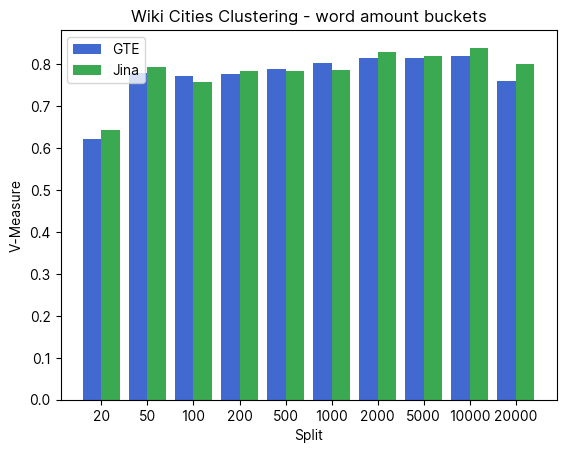

In [7]:
# plot results
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Inter"
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", [ "#4269D0","#3BA951", "#EFB117", "#FF725C"])


# plot gte and jina results in one plot
fig, ax = plt.subplots()

x = np.arange(len(jina_results))

rects1 = ax.bar(x - 0.2, [gte_results[str(split)]["v_measure"] for split in gte_results], 0.4, label='GTE')
rects2 = ax.bar(x + 0.2, [jina_results[str(split)]["v_measure"] for split in jina_results], 0.4, label='Jina')

ax.set_ylabel('V-Measure')
ax.set_xlabel('Split')

ax.set_xticks(x)
ax.set_xticklabels(jina_results.keys())

# add title
ax.set_title('Wiki Cities Clustering - word amount buckets')

ax.legend()
plt.savefig('./results/clustering/wiki_cities_buckets.png', dpi=300)
plt.show()